
# Analyse, projet 5 : réalisez une étude de marché 

Nous allons réaliser une étude sur nos données dans le but de trouver des pays qui serai profitable 


In [1]:

# Import des librairies
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import sklearn as sk
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib.collections import LineCollection
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn import decomposition, preprocessing

#Import des fonctions perso
import fonction as f

#Chemin du dossier pour les images de graph
dossierImg = "./image_Graph/"


In [2]:

#Import du dataframe nettoyé
df_final = pd.read_csv("Data/set_etudeFinal.csv")


In [3]:
#Copy pour toujours avoir l'orignal en cas de besoin
df = df_final.copy()
df.head()


,country_code,country,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion proteine animale (%),populations,Evolution de la population par rapport a l'an passée (en %),Pib par habitant,Variation du pib avec l'année precedente (en %)
0,1,Arménie,3305.726017,122.980308,35.160,2977,0.269,7727.9,2.886
1,2,Afghanistan,2260.511826,80.206872,15.223,30552,2.438,1848.7,0.511
2,3,Albanie,3639.130747,145.509579,40.829,3173,0.348,10492.8,1.186
3,4,Algérie,3605.321287,122.401767,20.408,39208,1.887,13253.6,0.696
4,7,Angola,2647.511826,84.093955,21.880,21472,3.127,6188.0,3.135



Dans un premier temps, nous allons constituer des groupes de pays plutôt similaire. Cela nous permettra de vite choisir les groupes les plus prometteurs et d'avoir une idée du type de pays présent dans ces derniers.


In [4]:

df_etudeCluster = df[["country_code", "country","Disponibilité alimentaire (Kcal/personne/jour)",
                     "Disponibilité de protéines en quantité (g/personne/jour)",
                     "Proportion proteine animale (%)",
                     "Evolution de la population par rapport a l'an passée (en %)",
                     "Pib par habitant"]]
df_etudeCluster.head()


,country_code,country,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion proteine animale (%),Evolution de la population par rapport a l'an passée (en %),Pib par habitant
0,1,Arménie,3305.726017,122.980308,35.160,0.269,7727.9
1,2,Afghanistan,2260.511826,80.206872,15.223,2.438,1848.7
2,3,Albanie,3639.130747,145.509579,40.829,0.348,10492.8
3,4,Algérie,3605.321287,122.401767,20.408,1.887,13253.6
4,7,Angola,2647.511826,84.093955,21.880,3.127,6188.0



Nous avons sélectionné les données par lesquelles nous classerons nos pays. Dans un premier temps, est ce que la population aurait les moyens de consommer nos produits ? Nous prendrons ici le PIB pour cela. Ensuite est ce que la consommation de viandes est présente dans les moeurs et coutume, est ce que la population mange de la viande. Dans la même direction est ce que les ressources du pays sont suffisantes pour produire sur place. Les proportions de protéine animale couvriront le premier point tandis que la disponibilité alimentaire et disponibilité de protéines nous éclaireront sur le second. Finalement, nous avons pris l'évolution des populations afin d'avoir une idée de la croissance démographique du pays, une forte croissance serai intéressante d'un point de vue plus lointaine avec une augmentation de nos clients potentiels.


In [5]:

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_etudeCluster[["Disponibilité alimentaire (Kcal/personne/jour)",
                     "Disponibilité de protéines en quantité (g/personne/jour)",
                     "Proportion proteine animale (%)",
                     "Evolution de la population par rapport a l'an passée (en %)",
                     "Pib par habitant"]]


# préparation des données pour l'ACP
X = data_pca.values

#les intitulés
names = df_etudeCluster['country'] 
features = data_pca.columns

# Réduction Centrage
std_scale = sk.preprocessing.StandardScaler().fit(X)

X_scaled = std_scale.transform(X)



## ACP de nos données

Nous effectuons ici une ACP pour avoir une bonne idée du lien de nos données.



### Éboulis des valeurs propres

Nous réalisons cet éboulis pour savoir combien d'axes nous étudierons dans notre ACP


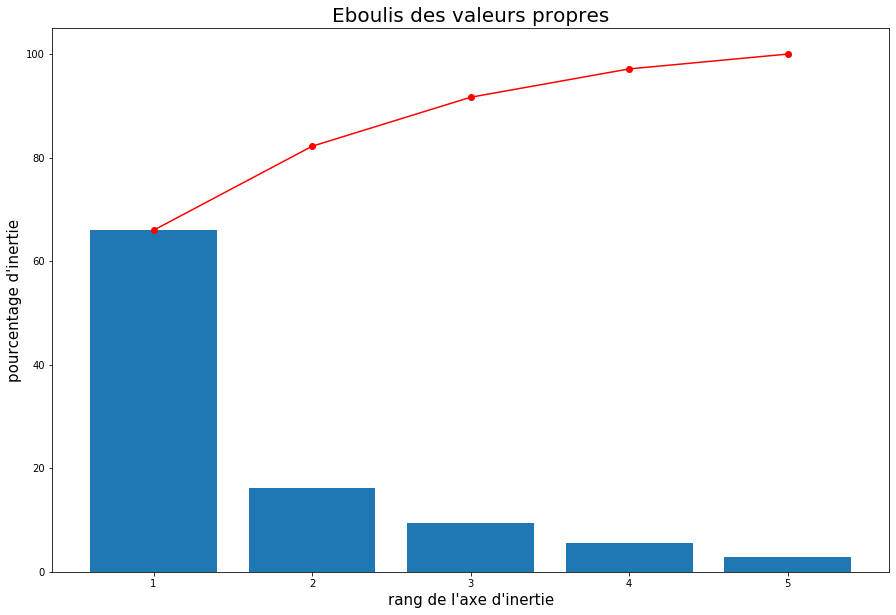

In [6]:

# choix du nombre de composantes à calculer
n_comp = 5

# Calcul des composantes principales
pca = sk.decomposition.PCA(n_components=n_comp)

pca.fit(X_scaled)


plt.figure(figsize=(15,10))
plt.xlabel("rang de l'axe d'inertie", fontsize=15)
plt.ylabel("pourcentage d'inertie", fontsize=15)
plt.title("Eboulis des valeurs propres",fontsize=20)

scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')

plt.savefig(dossierImg + "graph1.png")
plt.show()



Ici, on voit que les deux premiers axes représentent plus de 80 % d'inertie. On ne prendra que le premier plan. (les axes 1 et 2)


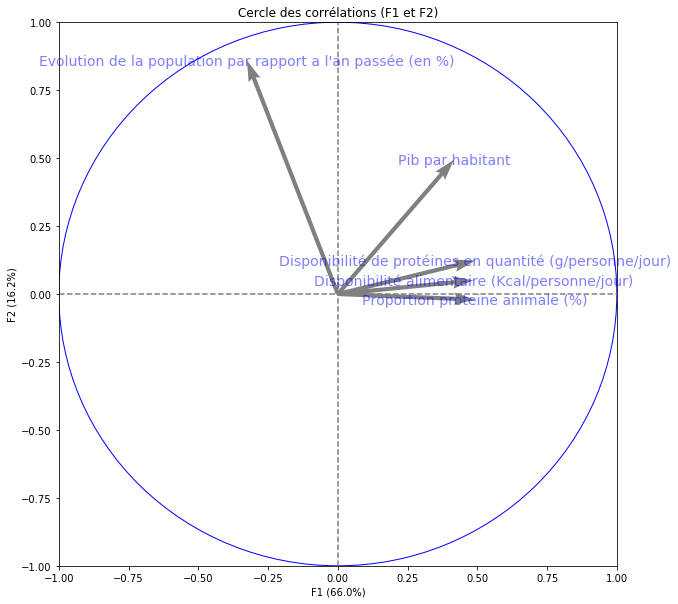

In [37]:

# préparation des données pour l'ACP
X = data_pca.values

#les intitulés
names = df.index 
features = data_pca.columns

pca = sk.decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)
pcs = pca.components_

#Afichage du plan
f.display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))


In [9]:
# Contribution a l'inertie des axes pour chaque variable.
f1 = pcs[0]
f2 = pcs[1]
f3 = pcs[2]

In [31]:

df_contribution = pd.DataFrame({"Disponibilité alimentaire (Kcal/personne/jour)" : [f1[0],f2[0],f3[0]],
                     "Disponibilité de protéines en quantité (g/personne/jour)": [f1[1],f2[1],f3[1]],
                     "Proportion proteine animale (%)": [f1[2],f2[2],f3[2]],
                     "Evolution de la population par rapport a l'an passée (en %)": [f1[3],f2[3],f3[3]],
                     "Pib par habitant": [f1[4],f2[4],f3[4]]})
df_contribution = df_contribution.reset_index()
df_contribution = df_contribution.rename({"index":'axes'}, axis=1)
df_contribution['axes'] = ['f1','f2',"f3"]
df_contribution.round(2)


,axes,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion proteine animale (%),Evolution de la population par rapport a l'an passée (en %),Pib par habitant
0,f1,0.49,0.49,0.49,-0.33,0.42
1,f2,0.05,0.12,-0.02,0.86,0.49
2,f3,-0.50,-0.48,0.28,-0.25,0.62



On peut voire que certaine variables contribue plus a l'inertie de certain axes que d'autre.



### Corrélation entre les variables.

Penchons-nous un peut plus sur la corrélation des différentes variables.


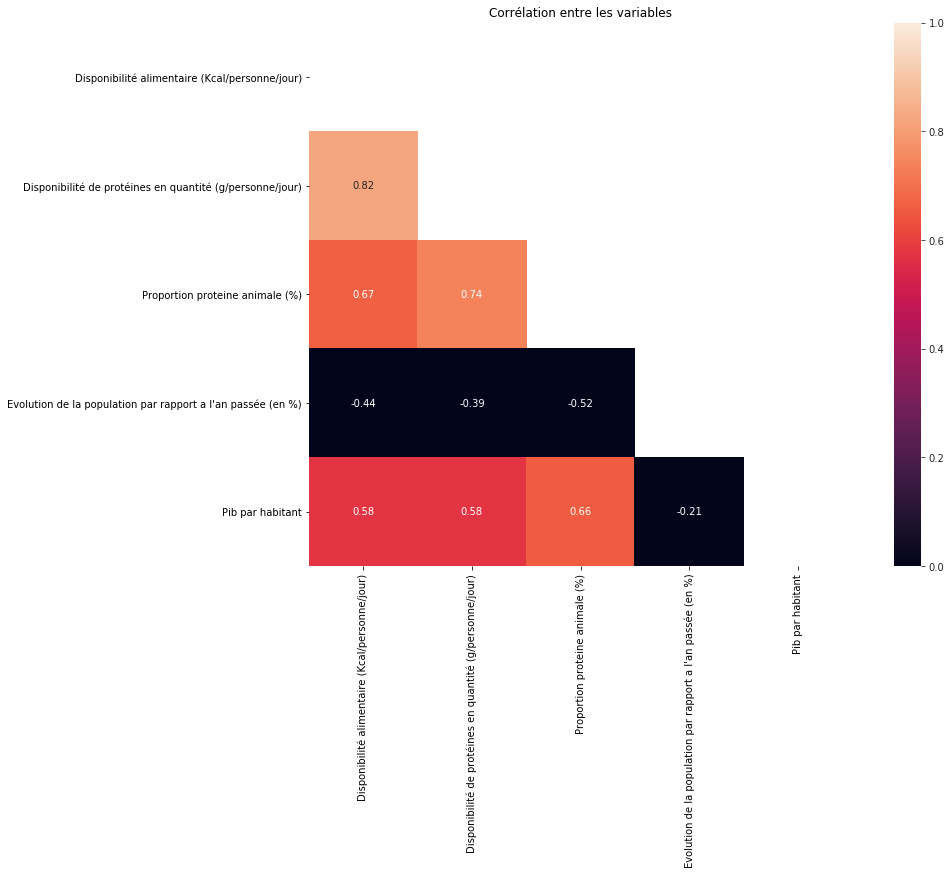

In [36]:

plt.figure(figsize=(15,10))
plt.title("Corrélation entre les variables")

corr = df_etudeCluster.drop(columns='country_code').corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = 0,vmax=1, square=True,annot=True)

plt.savefig(dossierImg + "graph2.png")
plt.show()


### Projection des individus sur le plan



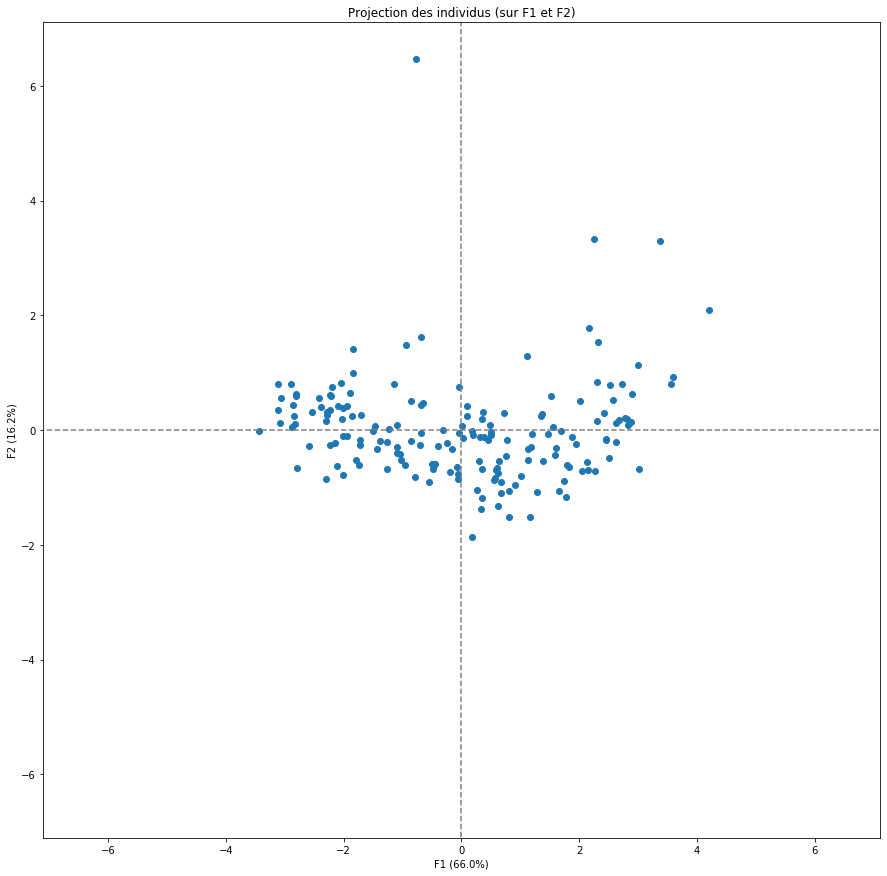

In [38]:
# Projection des individus

X_projected = pca.transform(X_scaled)

f.display_factorial_planes(X_projected, n_comp, pca, [(0,1)])



Déja la disposition des pays sur ce plan nous apprend certaine choses.
-----------------------------------------------------------------
Explicaiton à continuer


#### Clustering

Nous allons regrouper les individus similaire entre eux.


Pour savoir combier de groupe faire nous allons faire un dendogemme.

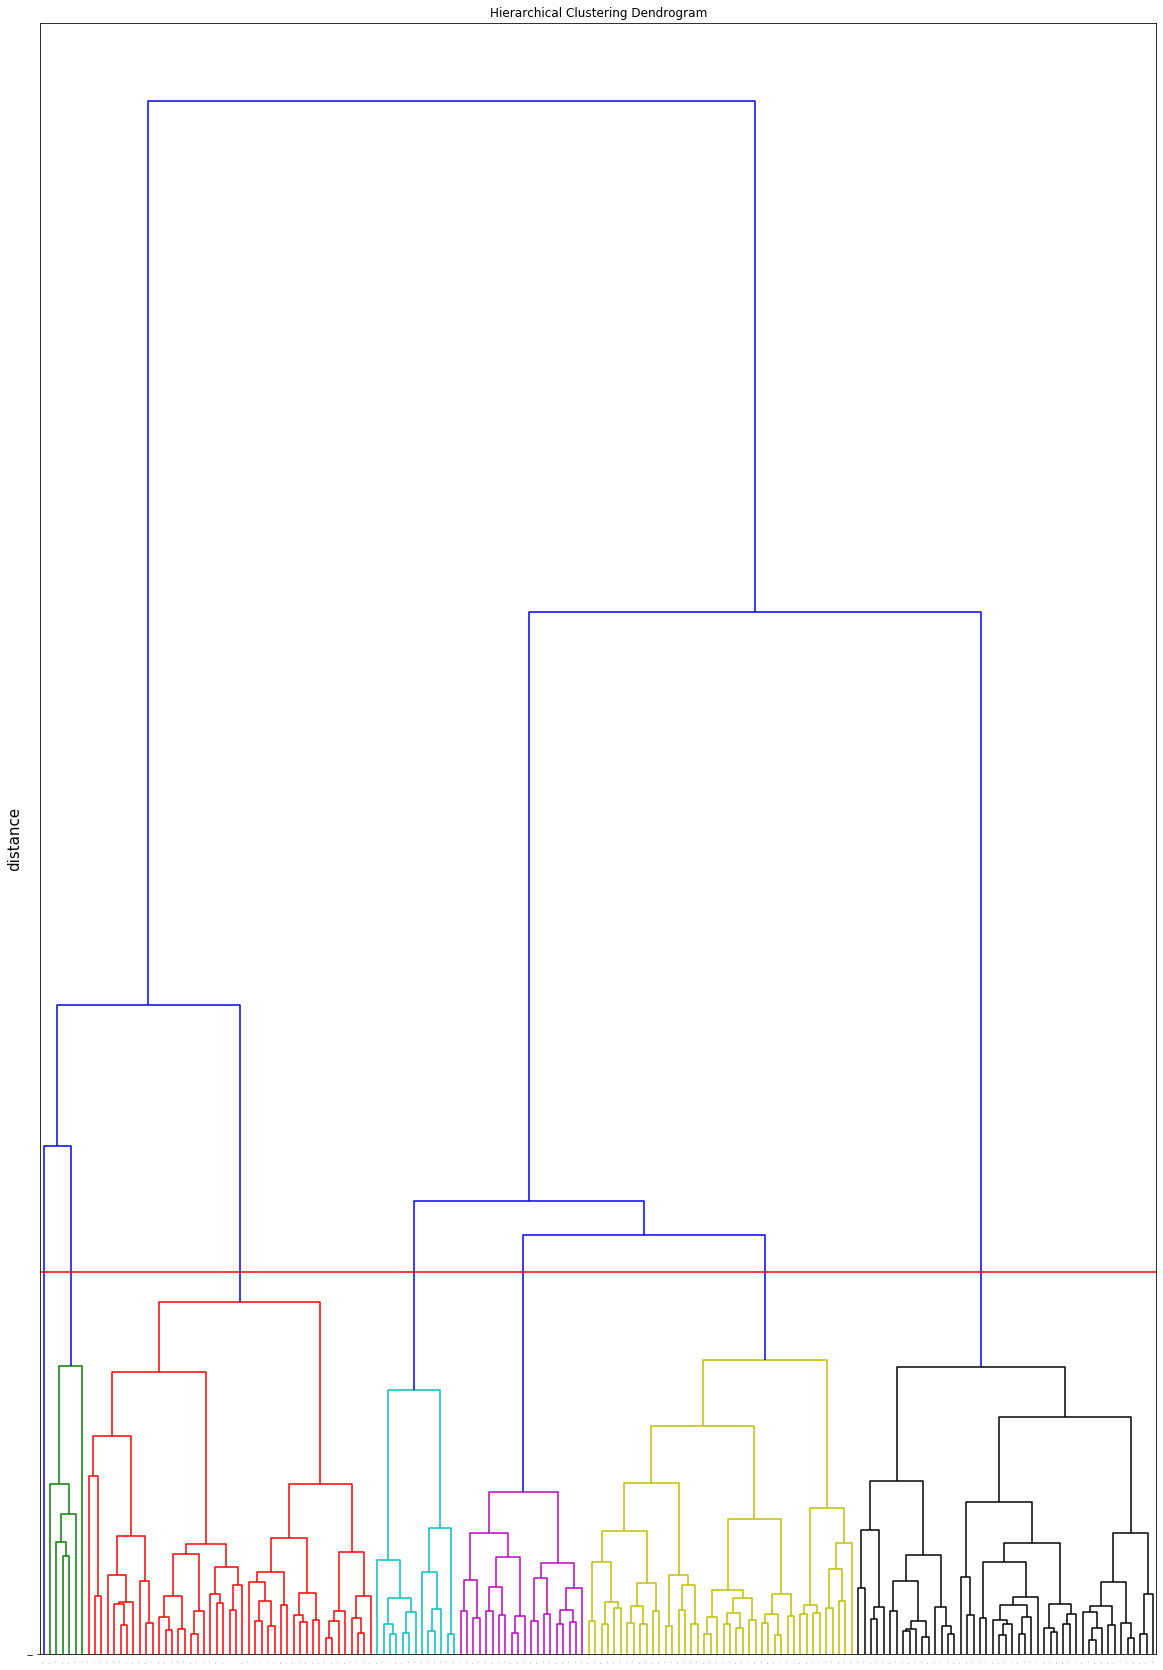

In [13]:

Z = linkage(X_scaled, 'ward', optimal_ordering=True)


# Affichage du dendrogramme

slope = 0
intercept = 6.5

plt.figure(figsize=(20,30))


dendrogram(
    Z,
    leaf_font_size=1,
    color_threshold=intercept
    )

x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals,'r', '--')


plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance', fontsize=15)
plt.savefig(dossierImg + "graph3.png")

plt.show()

Dendrograme des pays

##### Clusters des pays

Nous allons recuperer le clusters de chaque pays

<Figure size 1080x720 with 0 Axes>

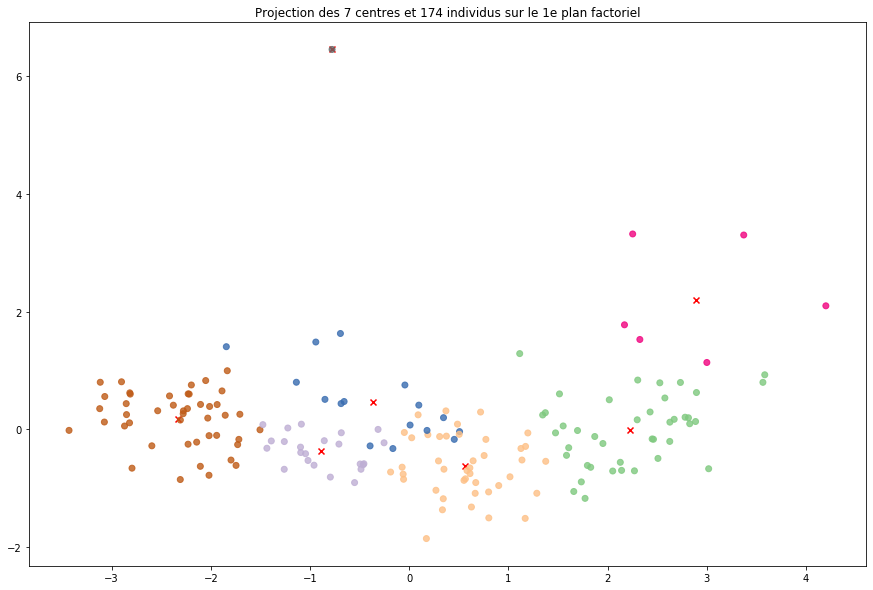

,country_code,country,Clusters
0,1,Arménie,2
1,2,Afghanistan,5
2,3,Albanie,0
3,4,Algérie,3
4,7,Angola,5
5,8,Antigua-et-Barbuda,2
6,9,Argentine,0
7,10,Australie,0
8,11,Autriche,0
9,12,Bahamas,2


In [14]:
#Nombre de clusters determiner plus haut
n_clust = 7

# Affichage des des individus et des centres de clusters sur le plan factoriel
plt.figure(figsize=(15,10))
# X_scaled = preprocessing.StandardScaler().fit_transform(X)

kmCentroids = KMeans(n_clusters=n_clust, random_state=3)
kmCentroids.fit(X)
centroidsR = kmCentroids.cluster_centers_

Y = X_scaled
km = KMeans(n_clusters=n_clust, random_state=3)
km.fit(Y)


clusters = km.labels_


pca = decomposition.PCA(n_components=3).fit(Y)
Y_projected = pca.transform(Y)

centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.figure(figsize=(15,10))
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], marker="x",color='red')
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=clusters.astype(np.float),cmap='Accent', alpha=.8)
plt.title("Projection des {} centres et {} individus sur le 1e plan factoriel".format(len(centroids),Y_projected.shape[0]))
plt.savefig(dossierImg + "graph4.png")

plt.show()


# Recuperation du clusters des pays

clusters = km.labels_
df_clusters = pd.DataFrame(index=[df_final.country_code,df_final.country])
df_clusters['Clusters'] = clusters
df_clusters = df_clusters.reset_index()
df_clusters.head(10)


In [15]:

df_final = df_final.merge(df_clusters, right_on=['country_code','country'], left_on=['country_code','country'])



Nous allons egalement recuperer la liste des centroïdes des clusters


In [16]:

df_centroids = pd.DataFrame(centroidsR)
df_centroids.to_csv('Data/set_centroids.csv',index=False)


Etude des clusters

Nous allons etudiers les clusters pour en selectionner un.


In [17]:

df_nbPaysCluster = pd.pivot_table(df_final, index="Clusters", aggfunc="count")
df_nbPaysCluster = df_nbPaysCluster.reset_index()
df_nbPaysCluster = df_nbPaysCluster.drop(columns=["Disponibilité alimentaire (Kcal/personne/jour)",
                          "Disponibilité de protéines en quantité (g/personne/jour)",
                          "Evolution de la population par rapport a l'an passée (en %)",
                          "Pib par habitant",
                          "Proportion proteine animale (%)",
                          "Variation du pib avec l'année precedente (en %)",
                          "country",
                          "populations"])
df_nbPaysCluster = df_nbPaysCluster.rename({"country_code":"Nombre pays clusters"},axis=1)
df_nbPaysCluster


,Clusters,Nombre pays clusters
0,0,41
1,1,23
2,2,42
3,3,16
4,4,6
5,5,45
6,6,1



Effectuons un premiers tri par rapport au pib par habitant.


In [18]:

df_selectionClusters = pd.pivot_table(df_final,index='Clusters',aggfunc='mean')
df_selectionClusters = df_selectionClusters.round(3)
df_selectionClusters = df_selectionClusters.drop(columns='country_code')


In [19]:

df_selectionClusters.sort_values(by ='Pib par habitant', ascending=False)


,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Evolution de la population par rapport a l'an passée (en %),Pib par habitant,Proportion proteine animale (%),Variation du pib avec l'année precedente (en %),populations
Clusters,,,,,,,
4,3658.776,134.457,1.730,83952.467,43.344,0.908,3212.000
6,3556.428,118.692,9.596,41924.800,38.503,-2.569,3632.000
0,3705.314,131.810,0.491,33322.512,47.305,1.159,30606.415
2,3185.174,113.401,0.477,15820.365,38.355,2.359,49974.524
1,2850.800,95.798,1.298,8911.913,29.596,3.789,43647.522
3,3295.332,117.478,2.225,8652.969,24.433,1.291,21124.188
5,2517.290,86.697,2.355,4130.980,15.528,1.942,50638.867



Explication des choix



Deuxieme passage sur le groupe 1



Pour choisir les pays avec plus de precision, nous allons rajouter quelque variable.
Nous allons avoire une vision plus fine des pays.

Mais nous devont garder en tete que ces pays doivent avoir des chiffres important dans nos variable pricipale, et nous prendrons cela en compte lors de notre choix


In [20]:

df_retenu = df_final[df_final.Clusters == 1].round(3)
df_retenu = df_retenu.reset_index()
df_retenu = df_retenu.drop('index',axis=1)


In [21]:

df_retenu.sort_values(by = ['populations'], ascending=False).head(20)


,country_code,country,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion proteine animale (%),populations,Evolution de la population par rapport a l'an passée (en %),Pib par habitant,Variation du pib avec l'année precedente (en %),Clusters
12,101,Indonésie,3123.024,90.243,19.636,249866,1.216,9643.3,4.238,1
14,165,Pakistan,2680.917,83.739,32.565,182143,1.665,4464.1,2.212,1
17,171,Philippines,2810.917,84.295,29.480,98394,1.744,6306.7,5.308,1
21,237,Viet Nam,3021.619,107.215,28.961,91680,0.974,5024.4,4.217,1
19,216,Thaïlande,3062.619,87.674,28.366,67011,0.338,14771.5,2.237,1
2,28,Myanmar,2816.917,111.872,30.150,53259,0.875,4457.9,7.453,1
5,44,Colombie,3181.726,99.669,33.591,48321,1.293,12296.3,3.852,1
22,276,Soudan,2647.321,106.049,30.842,37964,2.067,4177.3,1.957,1
20,236,Venezuela (République bolivarienne du),2910.619,96.126,39.667,30405,1.502,17665.2,-0.077,1
16,170,Pérou,2939.917,101.744,26.577,30376,1.294,11430.3,4.444,1



Lors d'un premiers tri nous avons retenu ces pays ci


In [22]:

df_retenu.loc[df_retenu.country.isin(["États-Unis d'Amérique","France","Fédération de Russie","Canada","Australie"])]


,country_code,country,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion proteine animale (%),populations,Evolution de la population par rapport a l'an passée (en %),Pib par habitant,Variation du pib avec l'année precedente (en %),Clusters



Nous avons donc selectionner ces 3 pays ci


In [23]:

df_retenu.loc[df_retenu.country.isin(["États-Unis d'Amérique","France","Fédération de Russie"])]


,country_code,country,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion proteine animale (%),populations,Evolution de la population par rapport a l'an passée (en %),Pib par habitant,Variation du pib avec l'année precedente (en %),Clusters



### Tests statistique


Parmis les quatres variable 'imposer' nous allons chercher une loi normale

Nous allons regarder, les variables suivante:

     - Diffrence de population

     - Proportion de proteine d'origine animale

     - Disponibilité alimentaire en kcal

     - Disponibilité alimentaire en proteine.


In [24]:

a1 = data_pca['Disponibilité alimentaire (Kcal/personne/jour)']
b1 = data_pca['Disponibilité de protéines en quantité (g/personne/jour)']
c1 = data_pca['Proportion proteine animale (%)']
d1 = data_pca['Evolution de la population par rapport a l\'an passée (en %)']



Nous allons utiliser le test *normaltest* , nous prendrons ici un rique alpha a 1%

Notre hypothese null est ici : La distribution de la variable suit une distribution normale


In [25]:

k2, p = st.normaltest(a1)
alpha = 0.01
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("L'hypothese null peut etre rejeté")
else:
     print("L'hypothese null ne peut pas etre rejeté")


p = 2.21113e-06
L'hypothese null peut etre rejeté



Le risque alpha est plus important que la p_value donc notre hypothese null est rejeter


In [26]:

k2, p = st.normaltest(b1)
alpha = 0.01
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("L'hypothese null peut etre rejeté")
else:
     print("L'hypothese null ne peut pas etre rejeté")

        

p = 0.551344
L'hypothese null ne peut pas etre rejeté



Ici la p_value est plus haute que le risque, donc nous pouvons garder l'hypothese h0


In [27]:

k2, p = st.normaltest(c1)
alpha = 0.01
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("L'hypothese null peut etre rejeté")
else:
     print("L'hypothese null ne peut pas etre rejeté")



p = 6.12001e-09
L'hypothese null peut etre rejeté



Le risque alpha est plus important que la p_value donc notre hypothese null est rejeter


In [28]:

k2, p = st.normaltest(d1)
alpha = 0.01
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("L'hypothese null peut etre rejeté")
else:
     print("L'hypothese null ne peut pas etre rejeté")



p = 2.5918e-21
L'hypothese null peut etre rejeté



Le risque alpha est plus important que la p_value donc notre hypothese null est rejeter



#### Test inter clusters

Ici nous voulons faire un test de comparaison entre une variable de deux clusters.
Nous allons donc faire une comparaison gaussienne


h0 = les deux distribution independente on la meme valeur moyenne

risque alpha  1%


In [29]:

st.ttest_ind(df_final["Disponibilité de protéines en quantité (g/personne/jour)"][df_final['Clusters']==1],
             df_final["Disponibilité de protéines en quantité (g/personne/jour)"][df_final['Clusters']==3],
             equal_var = False)


Ttest_indResult(statistic=-9.455605936602888, pvalue=2.7392606527538708e-11)


p_value est inferieur aux riques, l'hypothese null h0 est rejeter



Ici nous voulons faire un test de comparaison entre une variable de deux clusters.
Nous allons donc faire une comparaison gaussienne

h0 = les deux distribution non independente on la meme valeur moyenne


In [30]:

st.ttest_ind(df_final["Disponibilité de protéines en quantité (g/personne/jour)"][df_final['Clusters']==1],
             df_final["Disponibilité de protéines en quantité (g/personne/jour)"][df_final['Clusters']==3],
             equal_var = True)


Ttest_indResult(statistic=-9.111480684321135, pvalue=5.441353662235324e-11)

p_value est inferieur aux riques, l'hypothese null h0 est rejeter